In [1]:
#In this assignment, you'll get to use what you've learned this week to evaluate the 
#performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
#Import necessary packages
import pandas
import numpy
import datetime
import seaborn 
from pathlib import Path

%matplotlib inline

In [3]:
#In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps.
#After cleaning, combine all DataFrames into a single DataFrame.

In [4]:
#Creating filepaths and reading files using pandas

whale_path = Path("~/Pandas-homework/Resources/whale_returns.csv")
algo_path = Path("~/Pandas-homework/Resources/algo_returns.csv")
sp500_path = Path("~/Pandas-homework/Resources/sp500_history.csv")

whale_df = pandas.read_csv(whale_path)
algo_df = pandas.read_csv(algo_path)
sp500_df = pandas.read_csv(sp500_path)

In [5]:
#Whale Returns
#Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [7]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_df.dropna(inplace=True)

In [9]:
#Recount nulls to verify
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [10]:
#Set Date as index and deleting Date column
whale_df.set_index(pandas.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)

In [11]:
whale_df.drop(columns=['Date'], inplace=True)

In [12]:
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [13]:
#Algorithmic Daily Returns
#Read the algorithmic daily returns and clean the data

In [14]:
# Reading algorithmic returns
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [15]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [16]:
# Drop nulls
algo_df.dropna(inplace=True)

In [17]:
#Recount nulls to verify
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [18]:
#Set date as index and deleting Date Column
algo_df.set_index(pandas.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)

In [19]:
algo_df.drop(columns=['Date'], inplace=True)

In [20]:
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [21]:
#S&P 500 Returns¶
#Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [22]:
# Reading S&P 500 Closing Prices
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [23]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [24]:
#Converting Close to a string type for next code, to convert to float
sp500_df['Close'].convert_dtypes() 

0       $2933.68
1       $2907.97
2       $2905.03
3       $2900.45
4       $2907.06
          ...   
1644    $1460.93
1645    $1461.40
1646    $1450.99
1647    $1445.75
1648    $1444.49
Name: Close, Length: 1649, dtype: string

In [25]:
# Fix Data Types
sp500_df['Close'] = pandas.Series(sp500_df['Close']).str.replace('$','').astype(float)

In [26]:
#Check new types
sp500_df.dtypes

Date      object
Close    float64
dtype: object

In [27]:
#Checking dataframe
sp500_df.head()

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [28]:
#Setting Date as Index
sp500_df.set_index(pandas.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)

In [29]:
#Dropping date column
sp500_df.drop(columns=['Date'], inplace=True)

In [30]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [31]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [32]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["SP500"]
sp500_daily_returns.columns = columns

In [33]:
#checking DF
sp500_daily_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [34]:
#Combine Whale, Algorithmic, and S&P 500 Returns

In [35]:
#Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pandas.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")

In [36]:
#check data
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


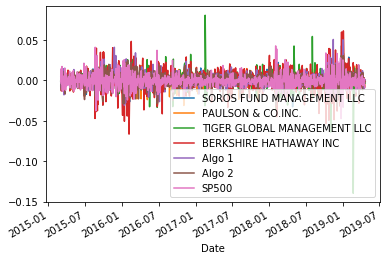

In [37]:
# Plot daily returns of all portfolios
combined_data.plot()

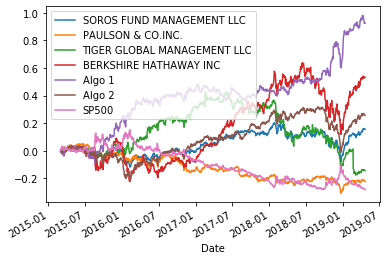

In [38]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot()

In [39]:
#Risk Analysis
#Determine the risk of each portfolio:

#Create a box plot for each portfolio.
#Calculate the standard deviation for all portfolios
#Determine which portfolios are riskier than the S&P 500
#Calculate the Annualized Standard Deviation

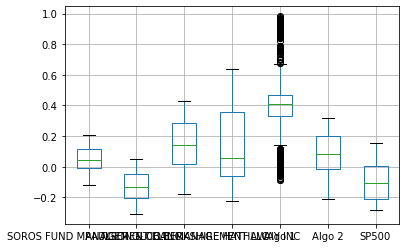

In [40]:
# Box plot to visually show risk
cumulative_returns.boxplot()

In [41]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns.std()

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
Algo 2                         0.131642
SP500                          0.114846
dtype: float64

In [42]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns.std()

SP500    0.008135
dtype: float64

In [43]:
# Determine which portfolios are riskier than the S&P 500
whale_df.std().mean()

0.009618471706059284

In [44]:
algo_df.std().mean()

0.008227087477314429

In [45]:
# The whales portfolio is riskier than the S&P 500

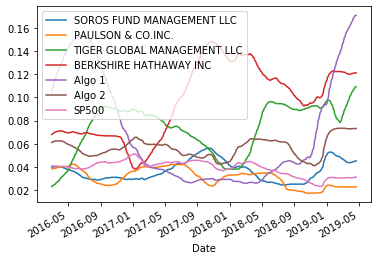

In [46]:
# Calculate the annualized standard deviation (252 trading days)
cumulative_returns.rolling(window=252).std().plot()

In [47]:
#Rolling Statistics
#Risk changes over time. Analyze the rolling statistics for Risk and Beta.

#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
#Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
#Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

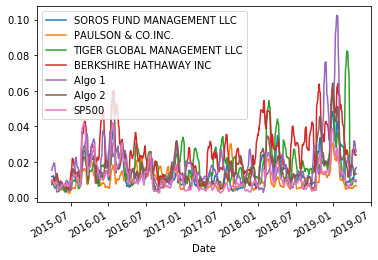

In [48]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cumulative_returns.rolling(window=21).std()
# Plot the rolling standard deviation
cumulative_returns.rolling(window=21).std().plot()

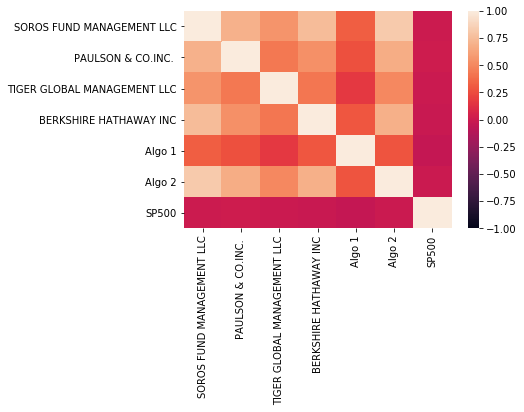

In [49]:
# Calculate the correlation
price_correlation = combined_data.corr()
# Display de correlation matrix
seaborn.heatmap(price_correlation, vmin=-1, vmax=1)

In [50]:
# Calculate covariance of a single portfolio
covariance_algo1 = algo_df['Algo 1'].cov(sp500_daily_returns['SP500'])
covariance_algo2 = algo_df['Algo 2'].cov(sp500_daily_returns['SP500'])

In [51]:
# Calculate variance of S&P 500
variance_algo1 = algo_df['Algo 1'].var()
variance_algo2 = algo_df['Algo 2'].var()

In [52]:
# Computing beta
beta_algo1 = covariance_algo1 / variance_algo1
beta_algo2 = covariance_algo2 / variance_algo2

In [53]:
# Plot beta trend
rolling_covariance_algo1 = algo_df['Algo 1'].rolling(window=30).cov(sp500_daily_returns['SP500'])

In [54]:
rolling_variance_algo1 = algo_df['Algo 1'].rolling(window=30).var()

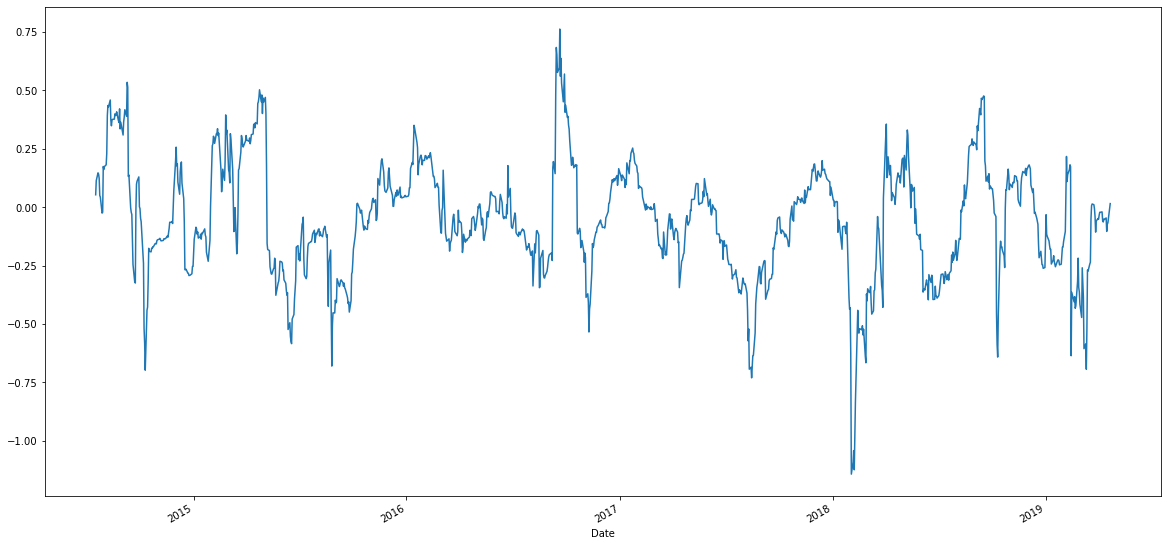

In [55]:
rolling_beta_algo1 = rolling_covariance_algo1 / rolling_variance_algo1
rolling_beta_algo1.plot(figsize=(20, 10))

In [56]:
#Rolling Statistics Challenge: Exponentially Weighted Average
#An alternative way to calculate a rolling window is to take the exponentially weighted moving average.
#This is like a moving window average, but it assigns greater importance to more recent observations. 
#Try calculating the ewm with a 21-day half-life.

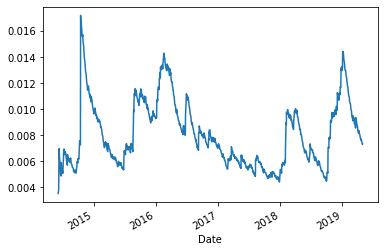

In [57]:
# Use `ewm` to calculate the rolling window
algo_df['Algo 2'].ewm(halflife=21).std().plot()

In [58]:
#Sharpe Ratios
#In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, 
#and not just returns alone. After all, if you could invest in one of two portfolios, 
#and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Annualized Sharpe Ratios
whale_sharpe_ratio = (whale_df.mean() * 252) / (whale_df.std() * numpy.sqrt(252))

In [60]:
algo_sharpe_ratio = (algo_df.mean() * 252) / (algo_df.std() * numpy.sqrt(252))

In [61]:
sp500_sharpe_ratio = (sp500_daily_returns.mean() * 252) / (sp500_daily_returns.std() * numpy.sqrt(252))

In [62]:
# Visualize the sharpe ratios as a bar plot

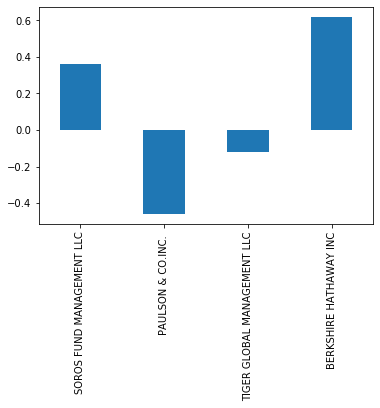

In [63]:
whale_sharpe_ratio.plot.bar()

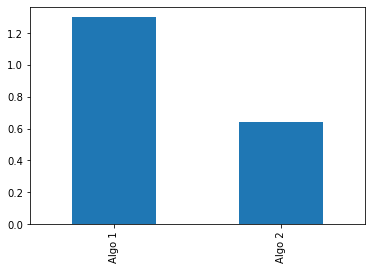

In [64]:
algo_sharpe_ratio.plot.bar()

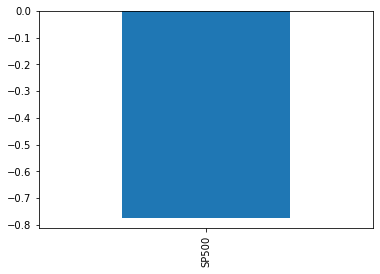

In [65]:
sp500_sharpe_ratio.plot.bar()

In [66]:
#Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
#Write your answer here!

#Based on the sharpe ratio, it is clear that algo 1 has outperformed algo 2 when being compared to the S&P500 and whales portfolio

In [67]:
#Create Custom Portfolio
#In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios 
#and the S&P 500.

#Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for 
#each stock.
#Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Join your portfolio returns to the DataFrame that contains all of the portfolio returns
#Re-run the performance and risk analysis with your portfolio to see how it compares to the others
#Include correlation analysis to determine which stocks (if any) are correlated
#Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
#For this demo solution, we fetch data from three companies listes in the S&P 500 index.

#GOOG - Google, LLC

#AAPL - Apple Inc.

#COST - Costco Wholesale Corporation

In [68]:
#Creating filepaths and reading files using pandas

goog_path = Path("~/Pandas-homework/Resources/goog_historical.csv")
aapl_path = Path("~/Pandas-homework/Resources/aapl_historical.csv")
cost_path = Path("~/Pandas-homework/Resources/cost_historical.csv")

goog_df = pandas.read_csv(goog_path)
aapl_df = pandas.read_csv(aapl_path)
cost_df = pandas.read_csv(cost_path)

In [69]:
#renaming columns to avoid confusion later when combining dataframes
goog_df = goog_df.rename(columns={'NOCP': 'GOOG'})

In [70]:
aapl_df = aapl_df.rename(columns={'NOCP': 'AAPL'})

In [71]:
cost_df = cost_df.rename(columns={'NOCP': 'COST'})

In [72]:
# Combine all stocks in a single DataFrame
combined_portfolio = pandas.concat([goog_df, aapl_df, cost_df], axis="columns", join="inner")

In [73]:
# Reset Date index
combined_portfolio.sort_index(inplace=True)

In [74]:
# Reorganize portfolio data by having a column per symbol
combined_portfolio.head()

,Symbol,Trade DATE,GOOG,Symbol,Trade DATE,AAPL,Symbol,Trade DATE,COST
0,GOOG,5/9/2019,1162.38,AAPL,5/9/2019,200.72,COST,5/9/2019,243.47
1,GOOG,5/8/2019,1166.27,AAPL,5/8/2019,202.90,COST,5/8/2019,241.34
2,GOOG,5/7/2019,1174.10,AAPL,5/7/2019,202.86,COST,5/7/2019,240.18
3,GOOG,5/6/2019,1189.39,AAPL,5/6/2019,208.48,COST,5/6/2019,244.23
4,GOOG,5/3/2019,1185.40,AAPL,5/3/2019,211.75,COST,5/3/2019,244.62


In [75]:
# Calculate daily returns
columns_port = ['GOOG', 'AAPL', 'COST']
combined_portfolio_returns = combined_portfolio[columns_port].pct_change()

In [76]:
combined_portfolio_returns.head()

,GOOG,AAPL,COST
0,NaN,NaN,NaN
1,0.003347,0.010861,-0.008749
2,0.006714,-0.000197,-0.004806
3,0.013023,0.027704,0.016862
4,-0.003355,0.015685,0.001597


In [77]:
# Drop NAs
combined_portfolio_returns.dropna(inplace=True)
# Display sample data
combined_portfolio_returns.head()

,GOOG,AAPL,COST
1,0.003347,0.010861,-0.008749
2,0.006714,-0.000197,-0.004806
3,0.013023,0.027704,0.016862
4,-0.003355,0.015685,0.001597
5,-0.019226,-0.012279,-0.007890


In [78]:
#Calculate the weighted returns for your portfolio, assuming equal number of shares per stock
weights = [1/3, 1/3, 1/3]
portfolio_returns_weighted = combined_portfolio_returns.dot(weights)
portfolio_returns_weighted.head()

1    0.001820
2    0.000570
3    0.019196
4    0.004642
5   -0.013131
dtype: float64

In [79]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns['Weighted'] = portfolio_returns_weighted

In [80]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns.head()

,GOOG,AAPL,COST,Weighted
1,0.003347,0.010861,-0.008749,0.001820
2,0.006714,-0.000197,-0.004806,0.000570
3,0.013023,0.027704,0.016862,0.019196
4,-0.003355,0.015685,0.001597,0.004642
5,-0.019226,-0.012279,-0.007890,-0.013131


In [81]:
# Calculate the annualized `std`
combined_portfolio.std()

GOOG    67.846776
AAPL    21.436472
COST    14.434399
dtype: float64

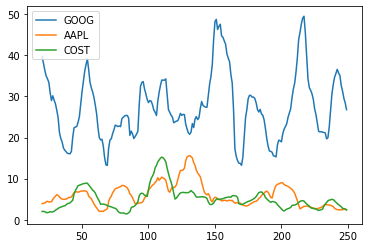

In [82]:
# Calculate and plot rolling std with 21-day window
# Calculate rolling standard deviation
combined_portfolio.rolling(window=21).std()

# Plot rolling standard deviation
combined_portfolio.rolling(window=21).std().plot()

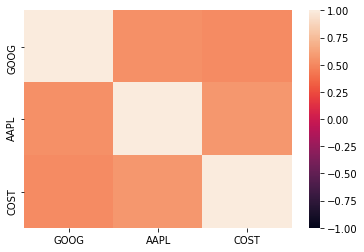

In [83]:
# Calculate and plot the correlation
price_correlation = combined_portfolio.corr()
seaborn.heatmap(price_correlation, vmin=-1, vmax=1)

In [84]:
# Calculate and plot Beta
covariance_port = combined_portfolio.cov()

In [85]:
variance_port = combined_portfolio.var()

In [86]:
beta_port = covariance_port / variance_port

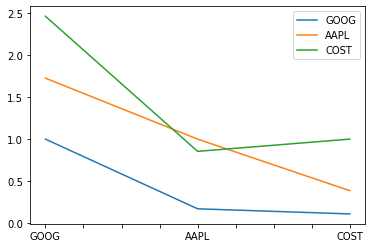

In [87]:
beta_port.plot()

In [88]:
# Calculate Annualzied Sharpe Ratios
combinedport_sharpe = (combined_portfolio_returns.mean() * 252) / (combined_portfolio_returns.std() * numpy.sqrt(252))

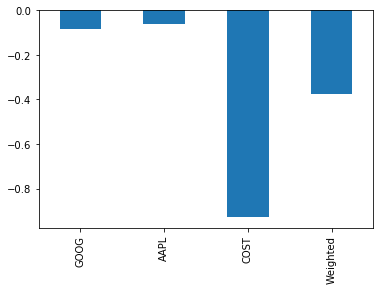

In [89]:
# Visualize the sharpe ratios as a bar plot
combinedport_sharpe.plot.bar()

In [90]:
#How does your portfolio do?

# My portfolio underperformed compared to the algo portfolio, the algo portfilio is still the best portfolio